In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

In [3]:
paths = [
    'results/ensemble5_top2_quantiles25_utd1_aveTilesFalse',
    # 'results/ensemble5_top1_quantiles25_utd1_aveTilesTrue',
    'results/ensemble5_top2_quantiles25_utd1_aveTilesTrue',
    # 'results/ensemble5_top3_quantiles25_utd1_aveTilesTrue',
    'results/ensemble2_top2_quantiles25_utd1_aveTilesTrue',
    'results/ensemble3_top2_quantiles25_utd1_aveTilesTrue',
    'results/ensemble3_top2_quantiles25_utd1_aveTilesTrue_initData256',
    # 'results/ensemble5_top2_quantiles25_utd20_aveTilesFalse'
    'results/ensemble5_top2_quantiles25_utd1_ENSsample_initData256',
    'results/ensemble5_top2_quantiles25_utd1_ENSave_initData256', # qem dim2 std among batch
         ]
labels = [
    'TQC',
    # 'TQC_ave_trun1',
    'TQC_ave_trun2',
    # 'TQC_ave_trun3',
    'TQC_ave_trun2_ensem2',
    'TQC_ave_trun2_ensem3',
    'TQC_ave_trun2_ensem3',
    # 'TQC_utd20',
    'TQC_sample_trun2',
    'TQC_ave_trun2_QEMdim2',
]
paths_highutd = [
    'results/ensemble5_top2_quantiles25_utd20_aveTilesFalse_initData5000',
    'results/ensemble5_top2_quantiles25_utd20_aveTilesTrue_initData5000',
    'results/ensemble10_top2_quantiles25_utd20_aveTilesTrue_initData5000',
]

labels_highutd = [
    'TQC',
    'TQC_ave_trun2',
    'TQC_ave_trun2_n10',
]

colors = {
    'TQC': 'tab:blue',
    'TQC_ave_trun1': 'tab:red',
    'TQC_ave_trun2': 'tab:green',
    'TQC_ave_trun3': 'tab:orange',
    'TQC_ave_trun2_ensem2': 'tab:cyan',
    'TQC_ave_trun2_ensem3': 'tab:grey',
    'TQC_utd20': 'tab:blue',
    'TQC_ave_trun2_n10': 'pink',
    'TQC_sample_trun2': 'purple',
    'TQC_ave_trun2_QEMdim2': 'tab:orange',
}
envs = [
    'Ant-v3',
    'Humanoid-v3',
    'Walker2d-v3',
]
xlims = {
    'Ant-v3': 5e6,
    'Humanoid-v3': 5e6,
    'Walker2d-v3': 5e6,
}

In [4]:
def get_env_dict(paths, labels):
    env_dict = {} # {Ant-v3: {label: [datas]}}
    for i, path in enumerate(paths):
        data_paths = glob.glob(os.path.join(path, '*'))
        env_dict_dir = {} # {Ant-v3: [datas]}
        for p in data_paths:
            env = p.split('_')[-2]
            if env not in env_dict_dir:
                env_dict_dir[env] = [p]
            else:
                env_dict_dir[env].append(p)
        for env, dp in env_dict_dir.items():
            if env not in env_dict:
                env_dict[env] = {labels[i]: dp}
            else:
                env_dict[env][labels[i]] = dp
    return env_dict

In [5]:
def plot(env_dict, n_ma=100, eval_freq=1e3, xlim_scale=1):
    for env, data_dict in env_dict.items():
        print('===============', env, '===============')
        for label, data_paths in data_dict.items():
            datas = []
            min_len = np.inf
            for data_path in data_paths:
                data = np.load(data_path)
                data = np.convolve(data, (np.ones(n_ma) / n_ma), mode="valid") 
                datas.append(data)
                min_len = len(data) if len(data) < min_len else min_len
            datas = [d[:min_len] for d in datas]
            datas = np.stack(datas)
            xaxis = np.array(range(datas.shape[1])) * eval_freq
            ax = sns.tsplot(datas, color=colors[label], time=xaxis)
            # ax.set_label(label)
        # plt.legend()
        plt.xlim(0, int(xlims[env]*xlim_scale))
        plt.show()

=============== Ant-v3 ===============


/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:296: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_c = df_c.pivot(unit, time, value)
/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:296: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_c = df_c.pivot(unit, time, value)
/home/mil/omura/

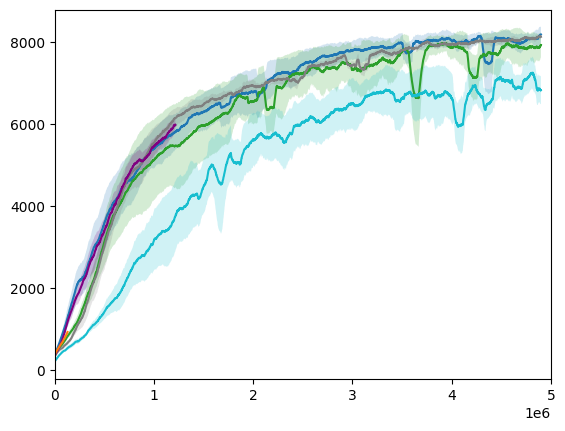

=============== Walker2d-v3 ===============


/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:296: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_c = df_c.pivot(unit, time, value)
/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:296: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_c = df_c.pivot(unit, time, value)
/home/mil/omura/

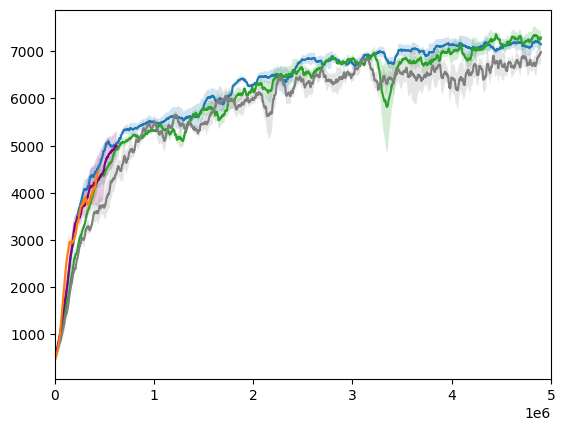

=============== Humanoid-v3 ===============


/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:296: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_c = df_c.pivot(unit, time, value)
/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:296: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_c = df_c.pivot(unit, time, value)
/home/mil/omura/

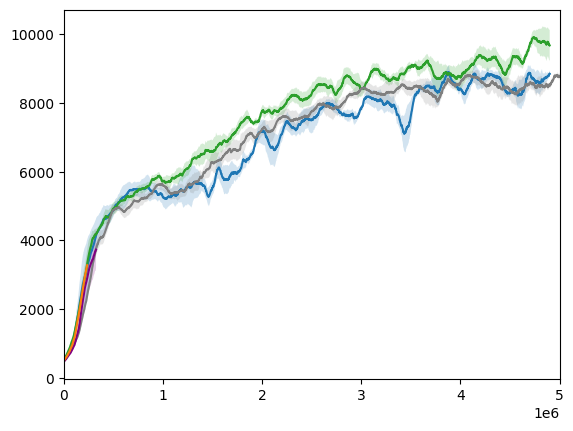

In [8]:
envd = get_env_dict(paths, labels)
plot(envd, n_ma=100)

=============== Ant-v3 ===============


/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:296: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_c = df_c.pivot(unit, time, value)
/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/mil/omura/anaconda3/envs/redq/lib/python3.8/site-packages/seaborn/timeseries.py:296: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_c = df_c.pivot(unit, time, value)
/home/mil/omura/

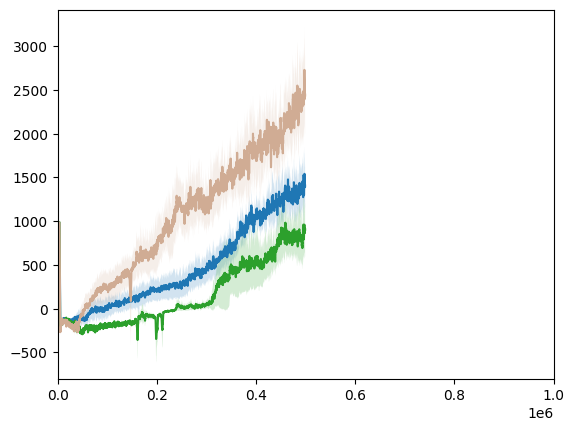

In [7]:
envd = get_env_dict(paths_highutd, labels_highutd)
plot(envd, n_ma=10, eval_freq=1e2, xlim_scale=0.2)